In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "gun-deaths-in-the-us-1968-2021" "vila"

**Import the libraries**

In [2]:
# Libraries
install.packages("naniar")
system("sudo apt-get -y install libmagick++-dev", intern=TRUE)
install.packages("magick", verbose=TRUE)

library(ggplot2) # plot library
library(tidyverse) # for data manipulation
library(gridExtra) # multiple plots in 1
library(magick) # attach dope image for visual
library(scales) # show the colors
library(ggrepel) # for graph repel (labels)
library(hexbin) # for hive scatter
library(naniar) # to check for missing data

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "Reading package lists..."                                                       
[2] "Building dependency tree..."                                                    
[3] "Reading state information..."                                                   
[4] "libmagick++-dev is already the newest version (8:6.9.10.23+dfsg-2.1ubuntu11.7)."
[5] "0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded."

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

system (cmd0): /usr/local/lib/R/bin/R CMD INSTALL

foundpkgs: magick, /tmp/RtmpIYfdUP/downloaded_packages/magick_2.7.4.tar.gz

files: /tmp/RtmpIYfdUP/downloaded_packages/magick_2.7.4.tar.gz

1): succeeded '/usr/local/lib/R/bin/R CMD INSTALL -l '/usr/local/lib/R/site-library' '/tmp/RtmpIYfdUP/downloaded_packages/magick_2.7.4.tar.gz''


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Linking to ImageMagick 6.9.10.23
Enabled features: fontconfig, freetype, fftw, lcms, pango, webp, x11
Disabled features: cairo, ghostscript, heic, raw, rsvg

Using 4 threads


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [3]:
# Function to plot width and height of plot
fig<-function(x,y){
    options(repr.plot.width = x, repr.plot.height = y)
    }

# **Import the dataset**

In [4]:

   data1 <- read.csv( '/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2006.csv',)
     data2 <- read.csv('/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2007.csv',)
     data3 <- read.csv('/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2008.csv',)
     data4 <- read.csv('/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2009.csv',)
     data5 <- read.csv('/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2010.csv',)
     data6 <- read.csv('/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2011.csv',)
     data7 <- read.csv('/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2012.csv',)
     data8 <- read.csv('/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2013.csv',)
     data9 <- read.csv('/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2014.csv',)
    data10 <- read.csv( '/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2015.csv',)
    data11 <- read.csv( '/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2016.csv',)
    data12 <- read.csv( '/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2017.csv',)
    data13 <- read.csv( '/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2018.csv',)
    data14 <- read.csv( '/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2019.csv',)
     data15 <- read.csv('/kaggle/input/gun-deaths-in-the-us-1968-2021/guns_2020.csv')


In [5]:
# combine the 15 distinct data frames into one

data <- rbind(data1, data2,data3, data4,
                      data5, data6, data7, data8, data9,
                      data10, data11, data12,data13, data14, data15)

In [6]:
dim(data)

[1] 529233     10

***The data was imported correctly so let's examine the dataset ***

In [7]:
head(data)

,year,month,intent,police,sex,age,race,hispanic,place,education
,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,2006,1,Suicide,0,M,81,White,100,Home,HS/GED
2,2006,1,Homicide,0,M,55,White,100,Other unspecified,Less than HS
3,2006,1,Homicide,0,M,19,Black,100,Home,Less than HS
4,2006,1,Homicide,0,M,33,Black,100,Other unspecified,Less than HS
5,2006,1,Homicide,0,M,23,Black,100,Home,Less than HS
6,2006,1,Suicide,0,M,88,White,100,Home,Less than HS


In [8]:
summary(data)

      year          month           intent              police       
 Min.   :2006   Min.   : 1.000   Length:529233      Min.   :0.00000  
 1st Qu.:2010   1st Qu.: 4.000   Class :character   1st Qu.:0.00000  
 Median :2014   Median : 7.000   Mode  :character   Median :0.00000  
 Mean   :2013   Mean   : 6.569                      Mean   :0.01282  
 3rd Qu.:2017   3rd Qu.: 9.000                      3rd Qu.:0.00000  
 Max.   :2020   Max.   :12.000                      Max.   :1.00000  
                                                                     
     sex                 age             race              hispanic    
 Length:529233      Min.   :  0.00   Length:529233      Min.   :100.0  
 Class :character   1st Qu.: 26.00   Class :character   1st Qu.:100.0  
 Mode  :character   Median : 40.00   Mode  :character   Median :100.0  
                    Mean   : 42.92                      Mean   :115.3  
                    3rd Qu.: 57.00                      3rd Qu.:100.0  
        

In [9]:
#count the  null value
sum(is.na(data))

[1] 19972

There are 19972 na value in this dataset, now the education column have more missing value then any other column

In [10]:
sum(is.na(data$education))

[1] 13208

In [21]:

listMissingColumns <- colnames(data)[ apply(data, 2, anyNA)]

print(listMissingColumns)

[1] "intent"    "age"       "place"     "education"


Replace the education missing value with the Other instead of na. if the education is empty this could mean that this person doean't 
have any education at all or it's could mean that he or she drop school before complete high school or even have a certain degree.   
the same will be daone with other columns

In [12]:
#replace na value in the column
     data$intent [is.na(data$intent )] <- "Undetermined"
    data$education [is.na(data$education )] <- "Other"
    data$place [is.na(data$place )] <- "Other unspecified"

In [13]:
str(data)

'data.frame':	529233 obs. of  10 variables:
 $ year     : int  2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 ...
 $ month    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ intent   : chr  "Suicide" "Homicide" "Homicide" "Homicide" ...
 $ police   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ sex      : chr  "M" "M" "M" "M" ...
 $ age      : int  81 55 19 33 23 88 23 23 43 23 ...
 $ race     : chr  "White" "White" "Black" "Black" ...
 $ hispanic : int  100 100 100 100 100 100 100 211 100 100 ...
 $ place    : chr  "Home" "Other unspecified" "Home" "Other unspecified" ...
 $ education: chr  "HS/GED" "Less than HS" "Less than HS" "Less than HS" ...


In [19]:
#so I will assumed the na value in r is probably kids under 1 year so i'm going to replace the na with 0 value
data$age[is.na(data$age)] <-"0"

In [17]:
sum(is.na(data$education))

[1] 0

In [39]:
summary(data$age)
data$age<-as.numeric(data$age)
is.numeric(is.numeric(data$age))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   26.00   40.00   42.91   57.00  109.00 

[1] FALSE


**Analyzing the dataset**

In [26]:
data %>% count(cause_of_death = intent)%>%arrange(desc(n))
data %>% count(place_of_death = place)%>%arrange(desc(n))

cause_of_death,n
<chr>,<int>
Suicide,315225
Homicide,201468
Accidental,8186
Undetermined,4354


place_of_death,n
<chr>,<int>
Home,295079
Other unspecified,74202
Other specified,72357
Street,60779
Trade/service area,17838
School/instiution,3245
Farm,2337
Industrial/construction,1376
Residential institution,1344


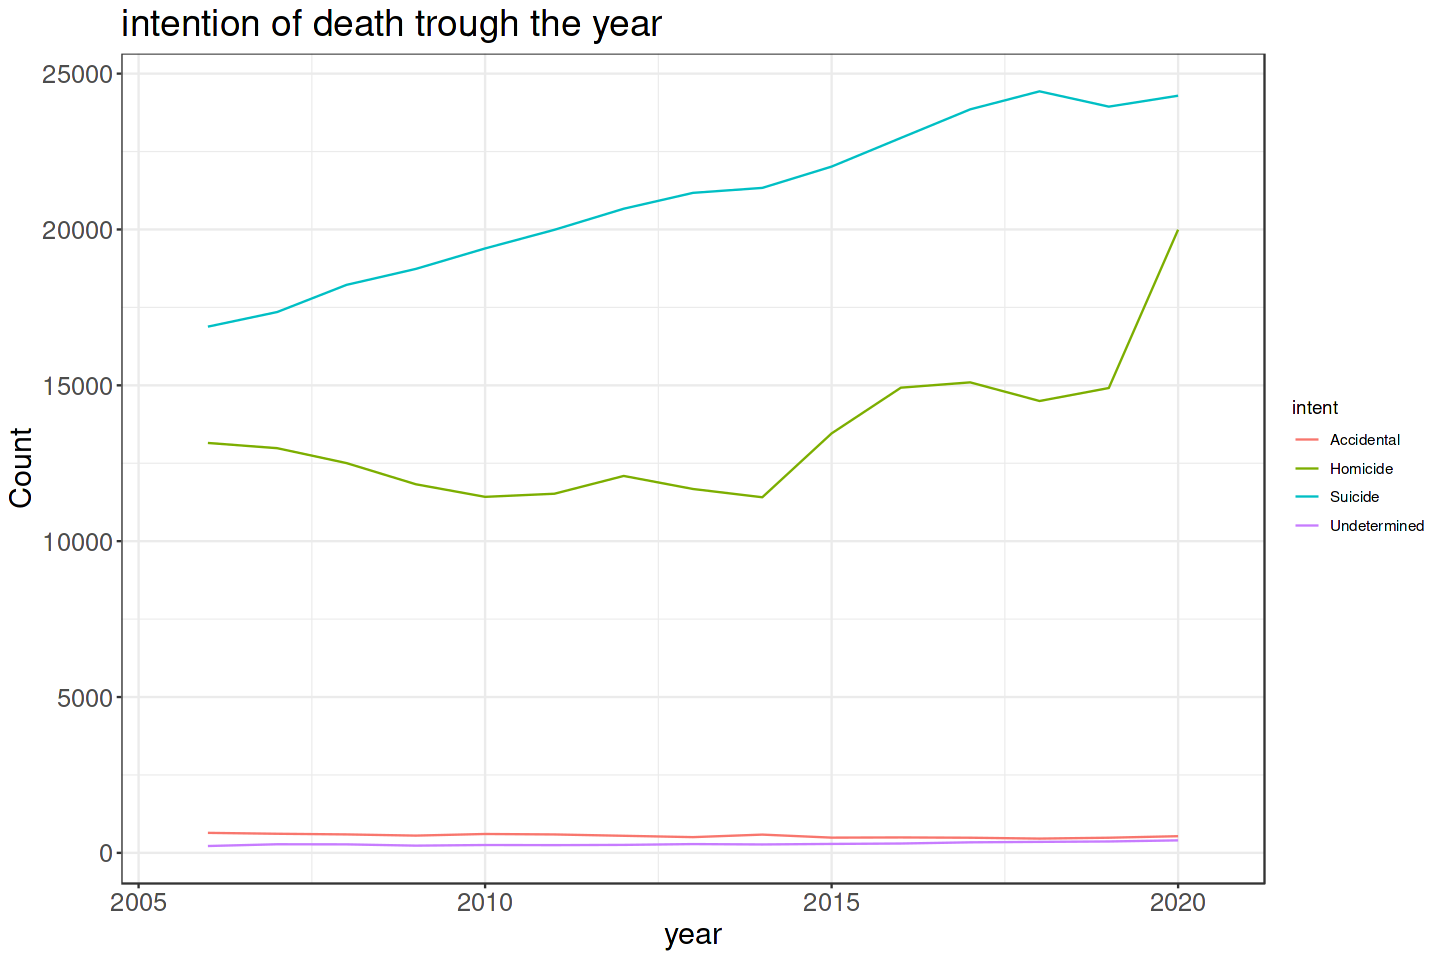

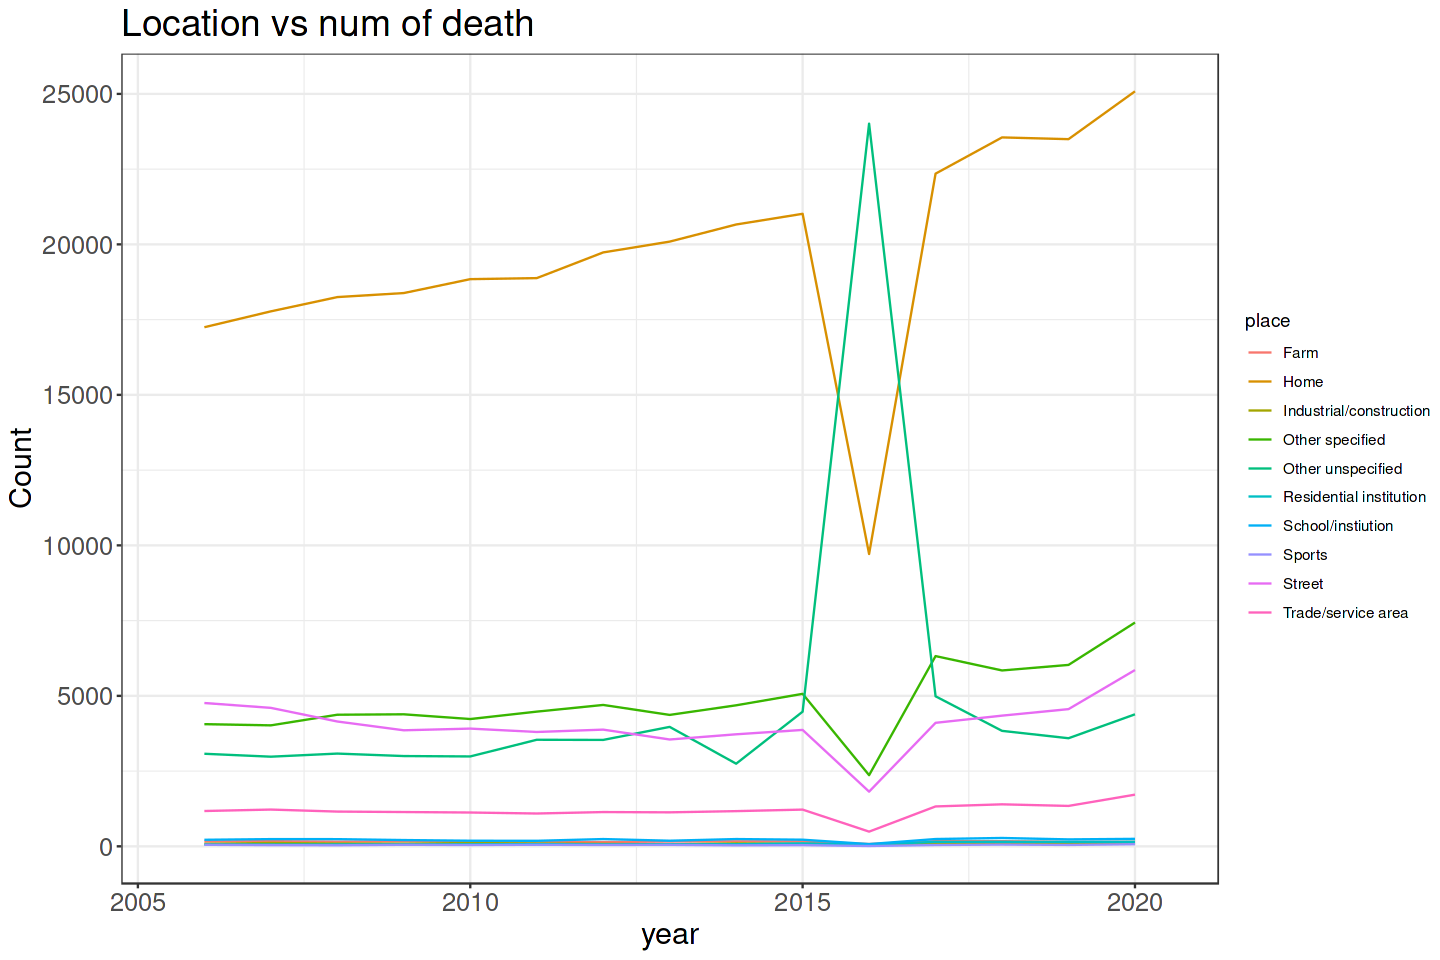

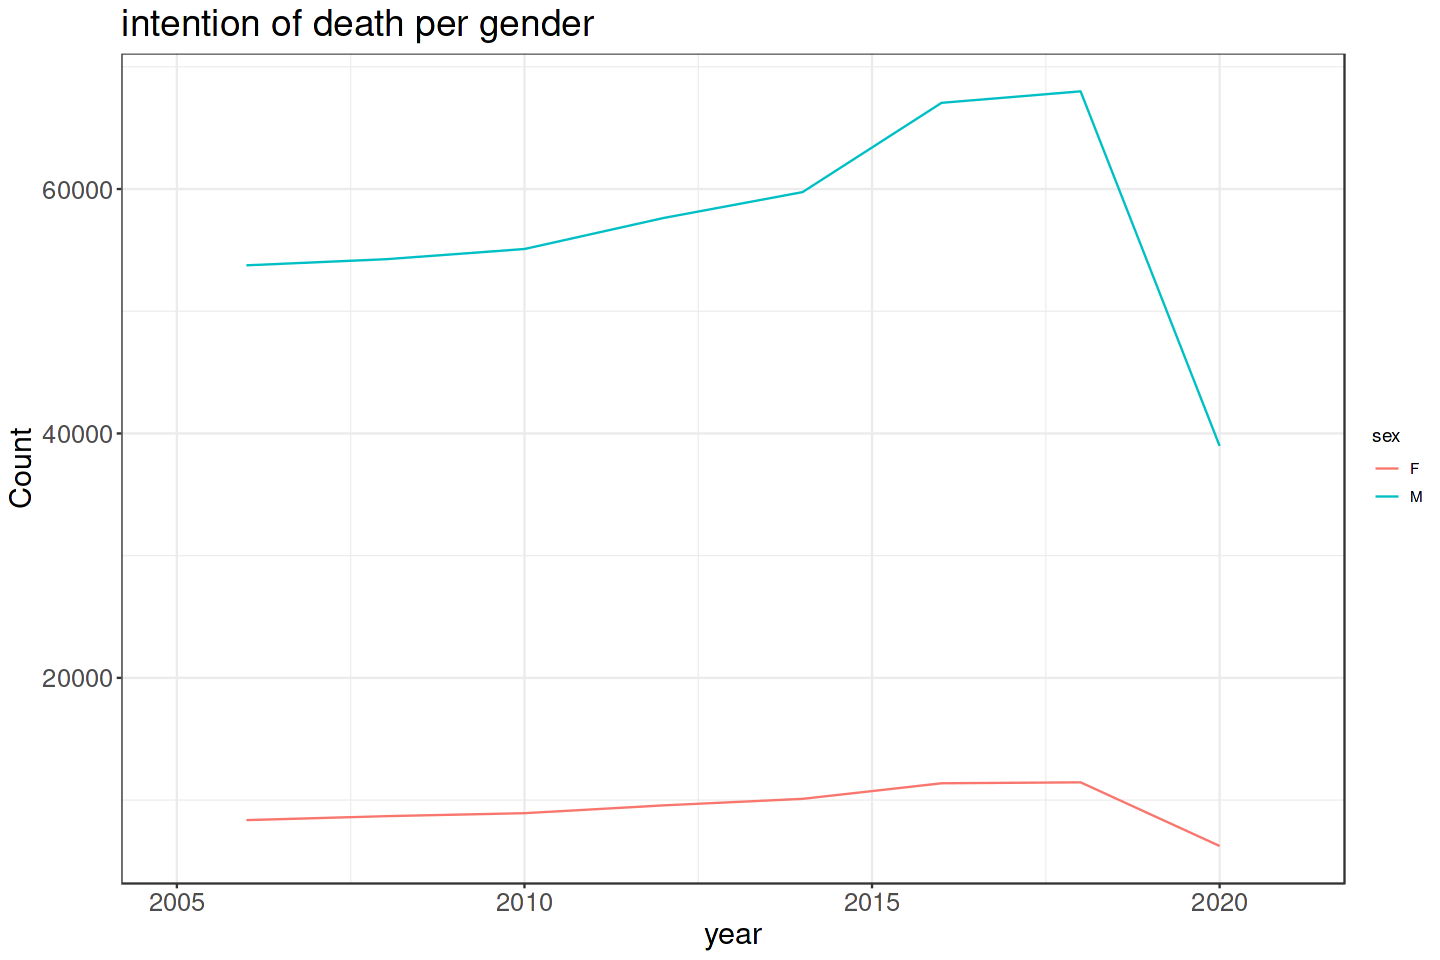

In [27]:
#intention of death trough the year
fig(12,8)

ggplot(data, aes(x=year, color= intent)) +
  geom_line(stat ="bin",binwidth=1)+
labs(x="year",
         y="Count", 
       title="intention of death trough the year ")+  
  theme_bw()+
theme(plot.title = element_text(size=22)
      ,axis.text.x= element_text(size=15),
       axis.text.y= element_text(size=15),
        axis.title=element_text(size=18))


#Location of death per gender
ggplot(data, aes(x=year, color= place)) +
  geom_line(stat ="bin",binwidth=1)+
labs(x="year",
         y="Count", 
       title="Location vs num of death ")+  
 theme_bw()+
theme(plot.title = element_text(size=22)
      ,axis.text.x= element_text(size=15),
       axis.text.y= element_text(size=15),
        axis.title=element_text(size=18))


#intention of death per gender
ggplot(data, aes(x=year, color= sex)) +
  geom_line(stat ="bin",binwidth=2)+
labs(x="year",
         y="Count", 
       title="year vs death per gender ")+  
 theme_bw()+
theme(plot.title = element_text(size=22)
      ,axis.text.x= element_text(size=15),
       axis.text.y= element_text(size=15),
        axis.title=element_text(size=18))

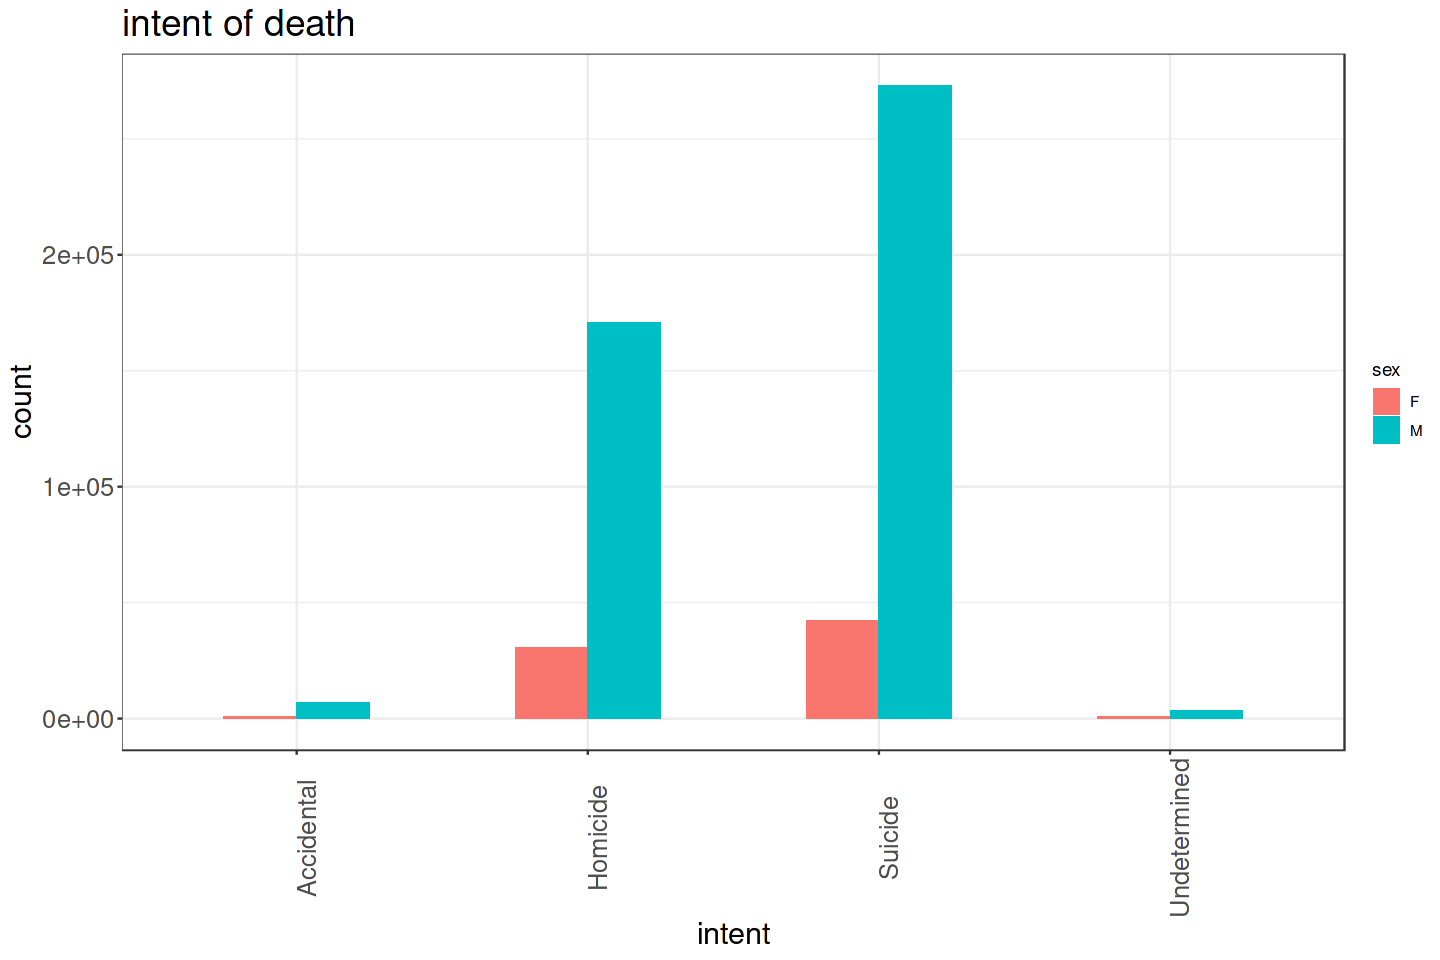

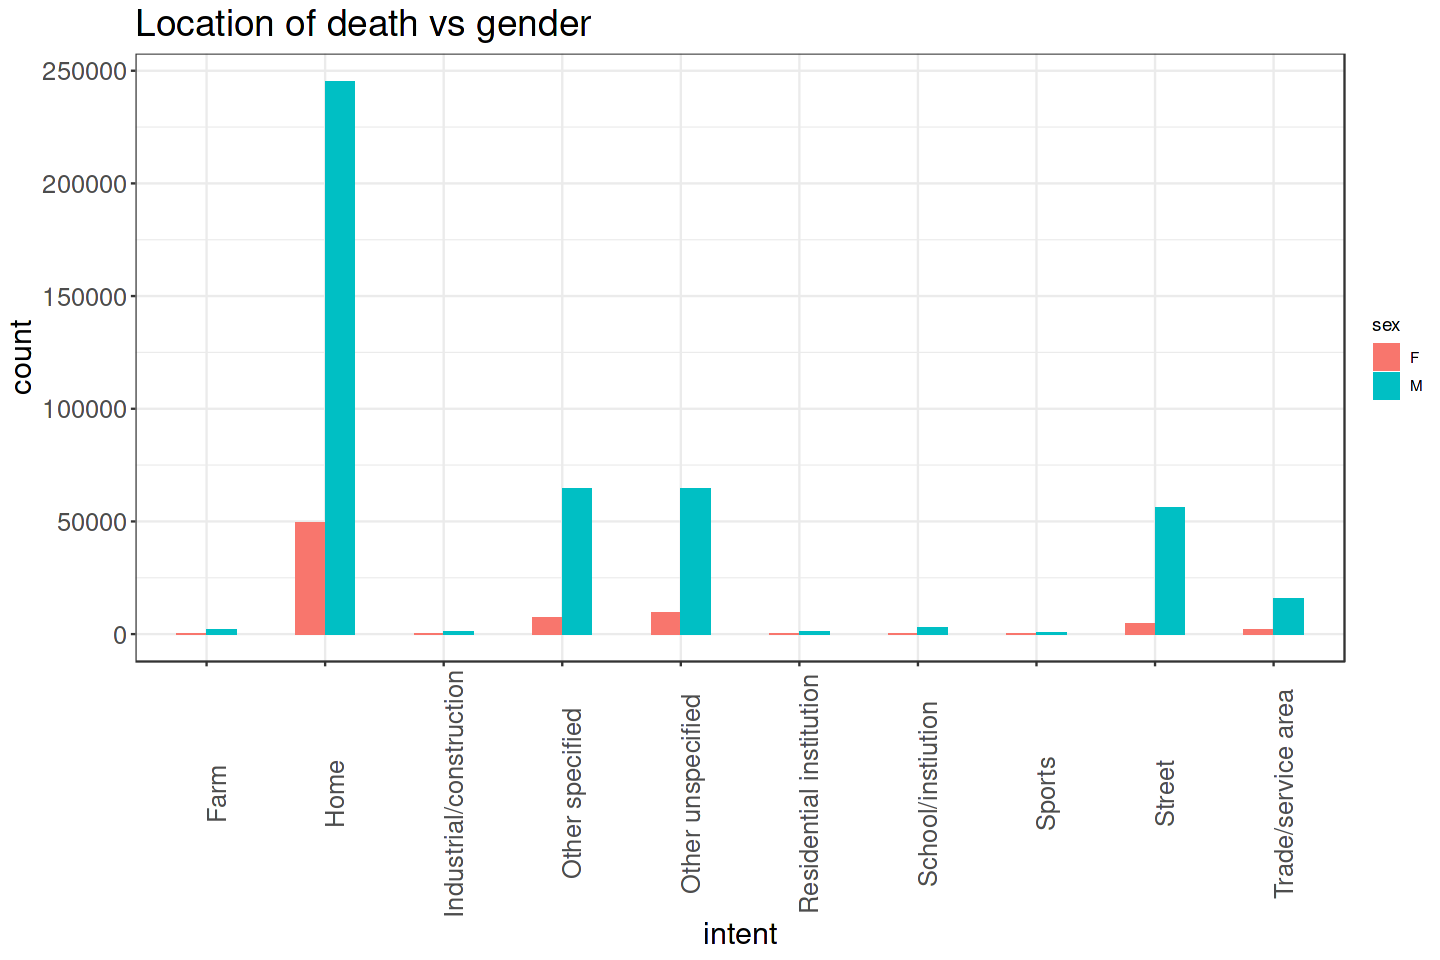

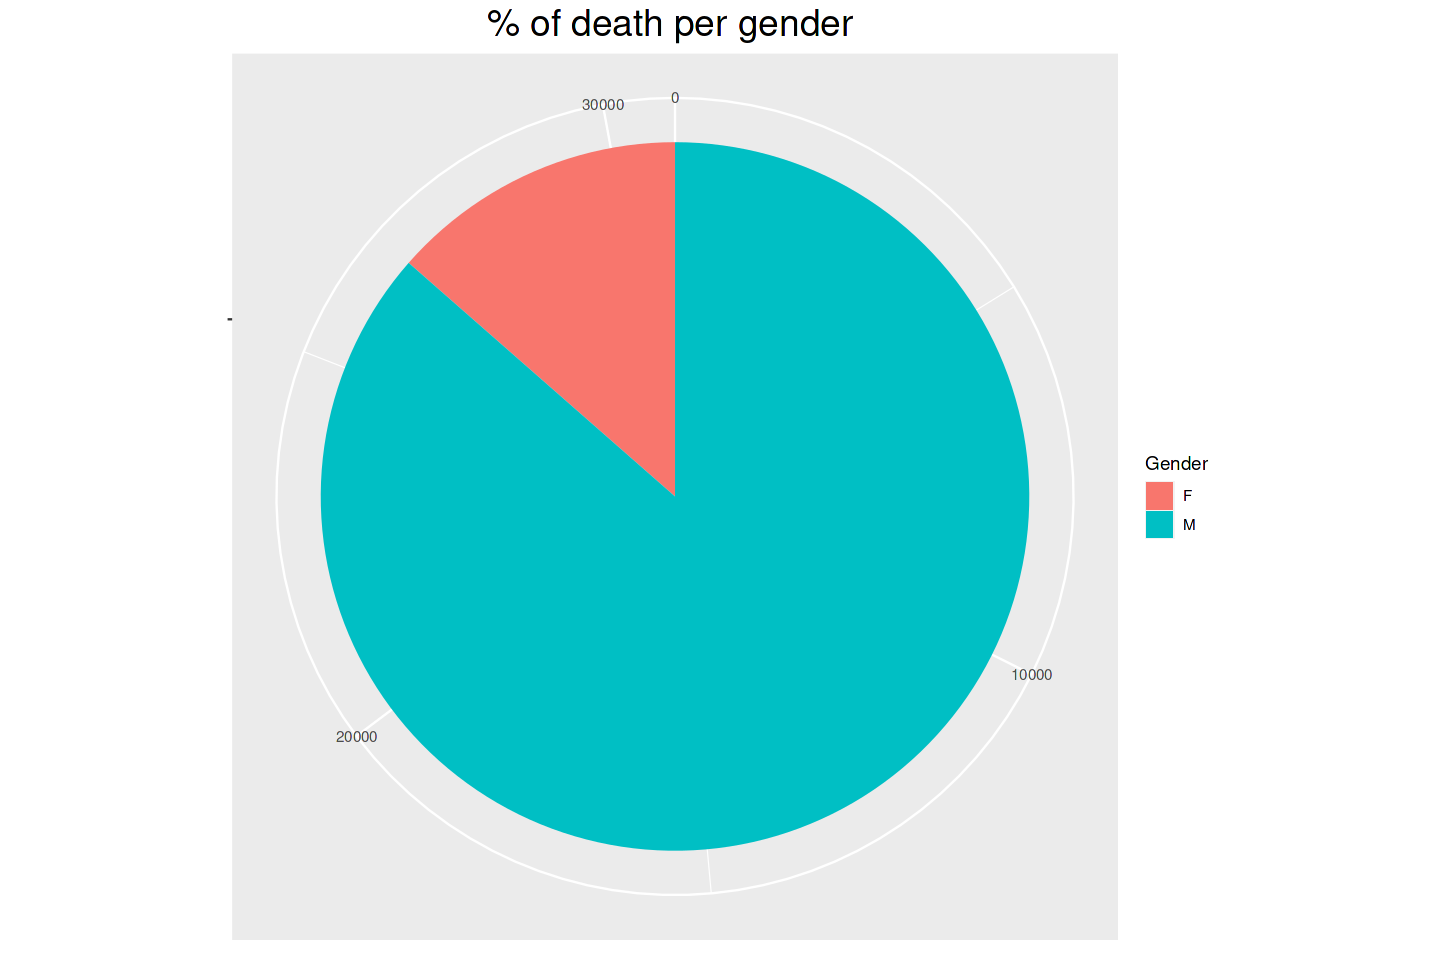

In [28]:
#cause of death
#place of death

fig(12,8)
ggplot(data, aes(x = intent,fill= sex ))+
geom_bar(stat="count", width = 0.5, position = "dodge")+
 labs(x="intent",
         y="count", 
       title="intent of death ")+ 
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15, angle = 90),
                            axis.text.y= element_text(size=15), axis.title=element_text(size=18))

#place of death
ggplot(data, aes(x = place,fill= sex ))+
geom_bar(stat="count", width = 0.5, position = "dodge")+
 labs(x="intent",
         y="count", 
       title="Location of death vs gender")+ 
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15, angle = 90),
                            axis.text.y= element_text(size=15), axis.title=element_text(size=18))

#pie chart visualization 
pie <- ggplot(data1, aes(x = "", fill = factor(sex))) + 
  geom_bar(width = 1) +
  theme(axis.line = element_blank(), 
        plot.title = element_text(hjust=0.5,size=22)) + 
  labs(fill="Gender", 
       x=NULL, 
       y=NULL, 
       title="% of death per gender ")
  
pie + coord_polar(theta = "y", start=0)

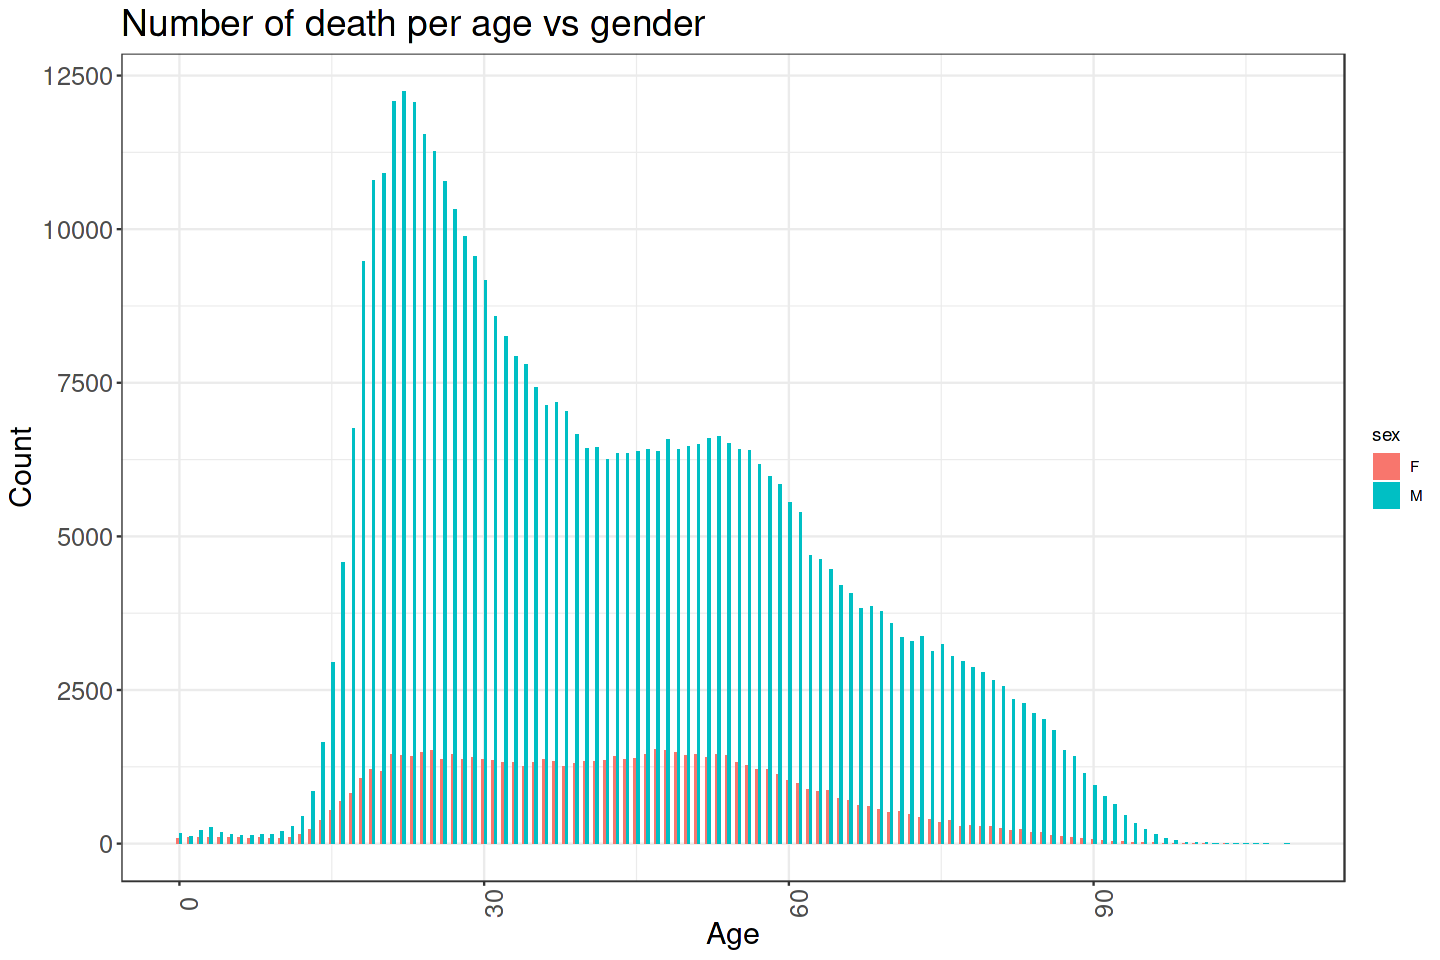

In [40]:
fig(12,8)

ggplot(data, aes(year,fill=sex))+
geom_bar(stat="count",position='dodge', width = 0.5)+  # Stack for stacked chart
 labs(x="Year",
         y="Count", 
       title="Number of death troughout the year vs gender")+ 
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15,angle=90),
                            axis.text.y= element_text(size=15), axis.title=element_text(size=18))

ggplot(data, aes(age,fill=sex))+
geom_bar(stat="count",position='dodge', width = 0.5)+  # Stack for stacked chart
 labs(x="Age",
         y="Count", 
       title="Number of death per age vs gender")+ 
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15,angle=90),
                            axis.text.y= element_text(size=15), axis.title=element_text(size=18))

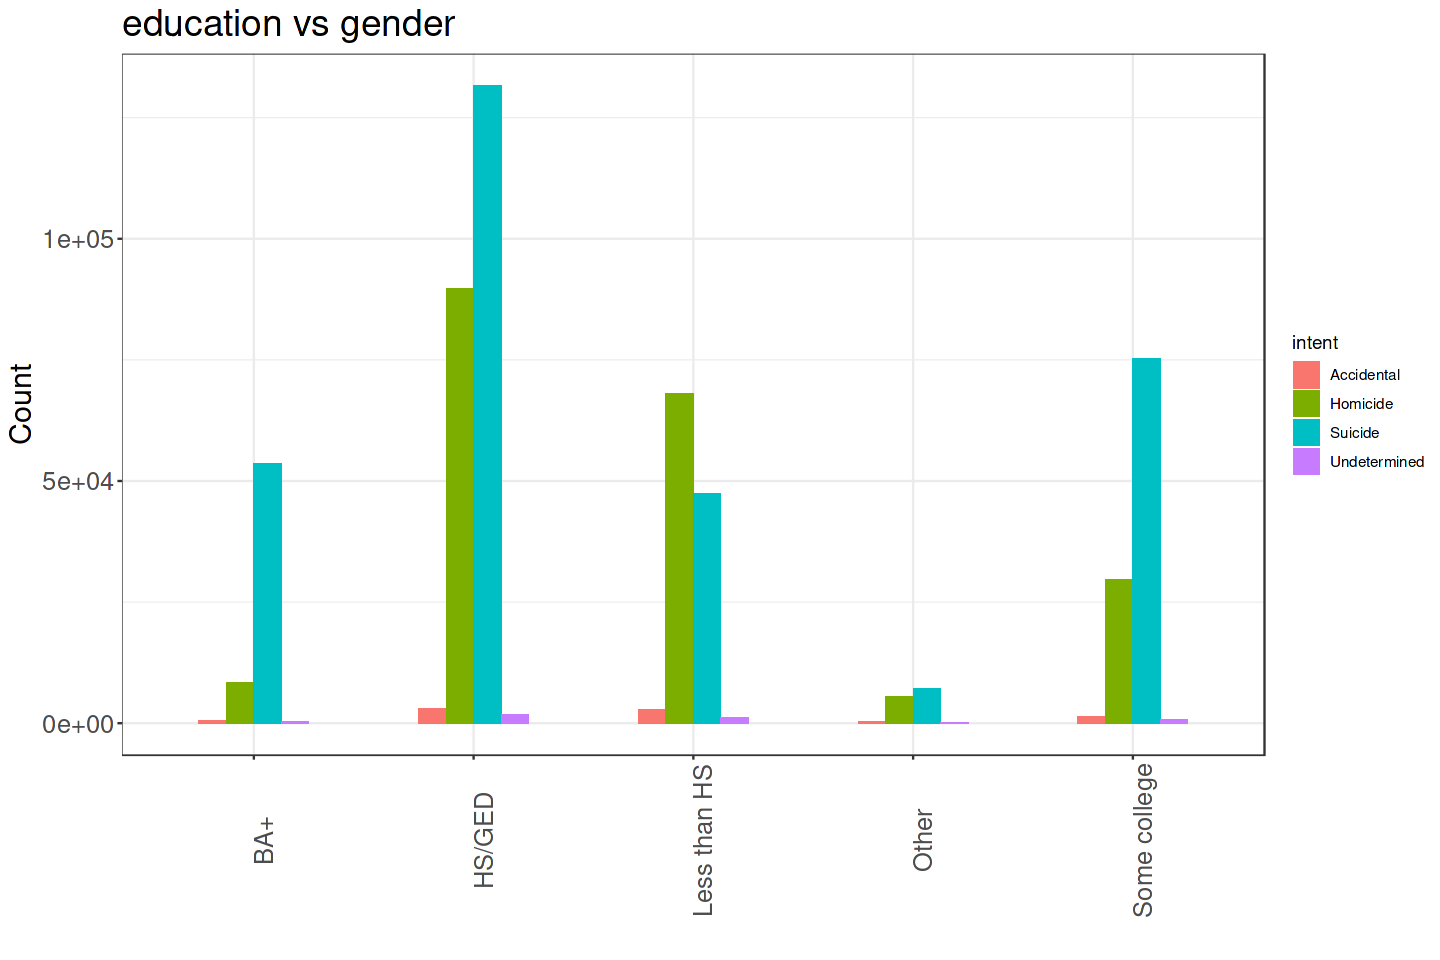

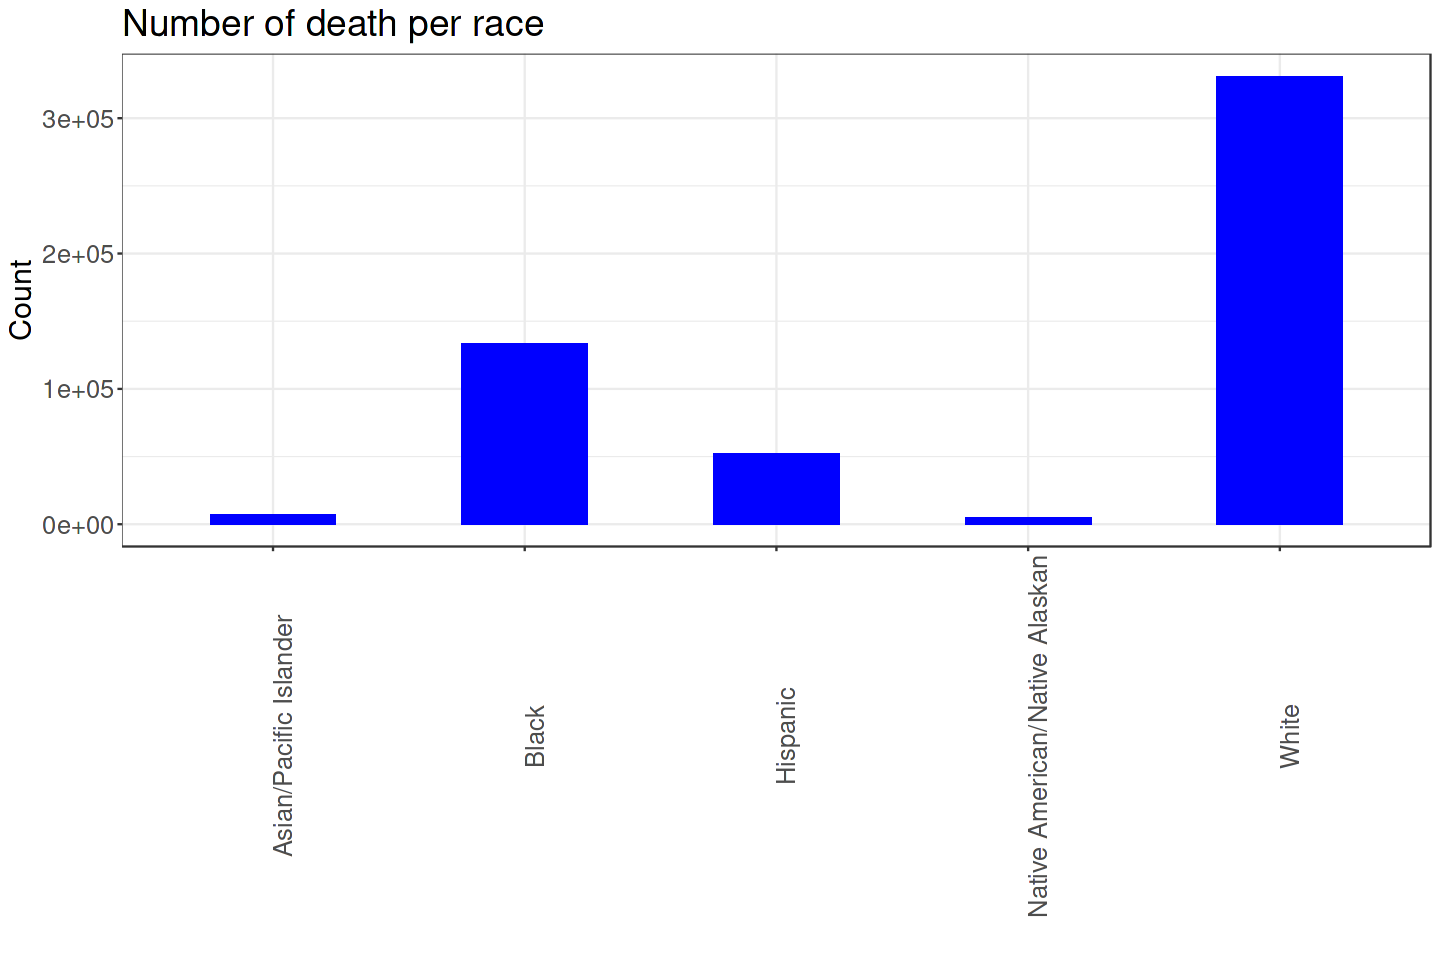

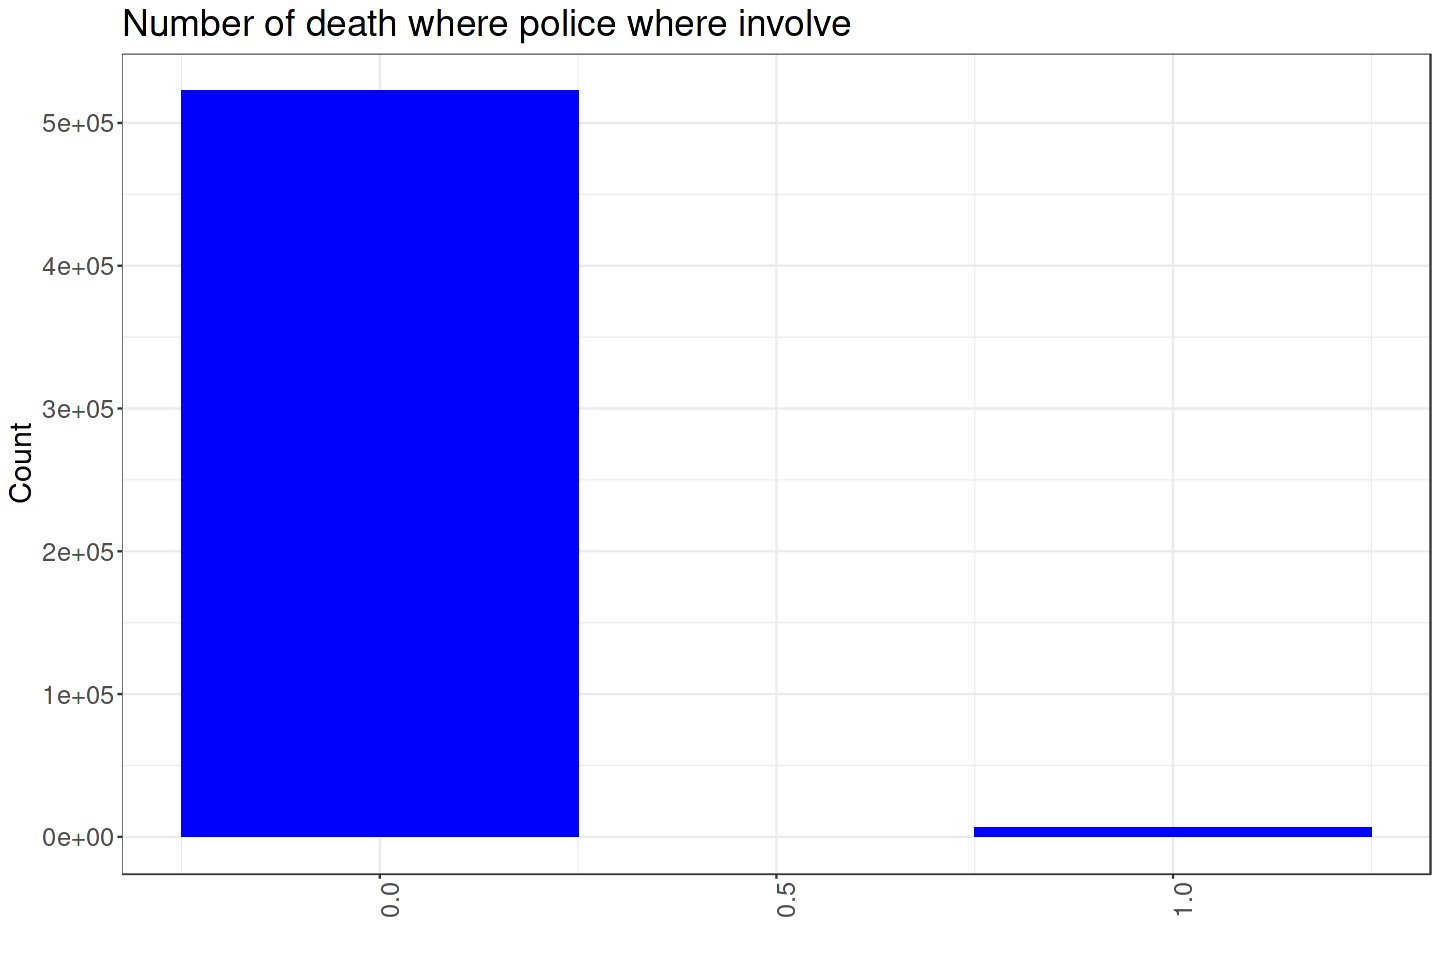

In [44]:
fig(12,8)

ggplot(data, aes(education,fill=intent))+
geom_bar(stat="count",position='dodge', width = 0.5)+  # Stack for stacked chart
 labs(x=" ",
         y="Count", 
       title="education vs gender")+ 
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15,angle=90),
                            axis.text.y= element_text(size=15), axis.title=element_text(size=18))

fig(12,8)



ggplot(data, aes(x=race))+
geom_bar(stat="count",position='dodge', width = 0.5, fill="blue")+  # Stack for stacked chart
 labs(x=" ",
         y="Count", 
       title="Number of death per race")+ 
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15,angle=90),
                            axis.text.y= element_text(size=15), axis.title=element_text(size=18))
#where any police involve
ggplot(data, aes(x=police))+
geom_bar(stat="count",position='dodge', width = 0.5, fill="blue")+  # Stack for stacked chart
 labs(x=" ",
         y="Count", 
       title="Number of death where police where involve")+ 
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15,angle=90),
                            axis.text.y= element_text(size=15), axis.title=element_text(size=18))

In [45]:
# selecting all numeric data

corr <- data %>%
  select(where(is.numeric))

,year,month,police,age,hispanic
year,1.000000000,0.005146683,0.007721518,0.01814274,-0.006243503
month,0.005146683,1.000000000,-0.001436362,-0.01226399,0.003054870
police,0.007721518,-0.001436362,1.000000000,-0.03626367,0.025018329
age,0.018142743,-0.012263987,-0.036263673,1.00000000,-0.104317541
hispanic,-0.006243503,0.003054870,0.025018329,-0.10431754,1.000000000


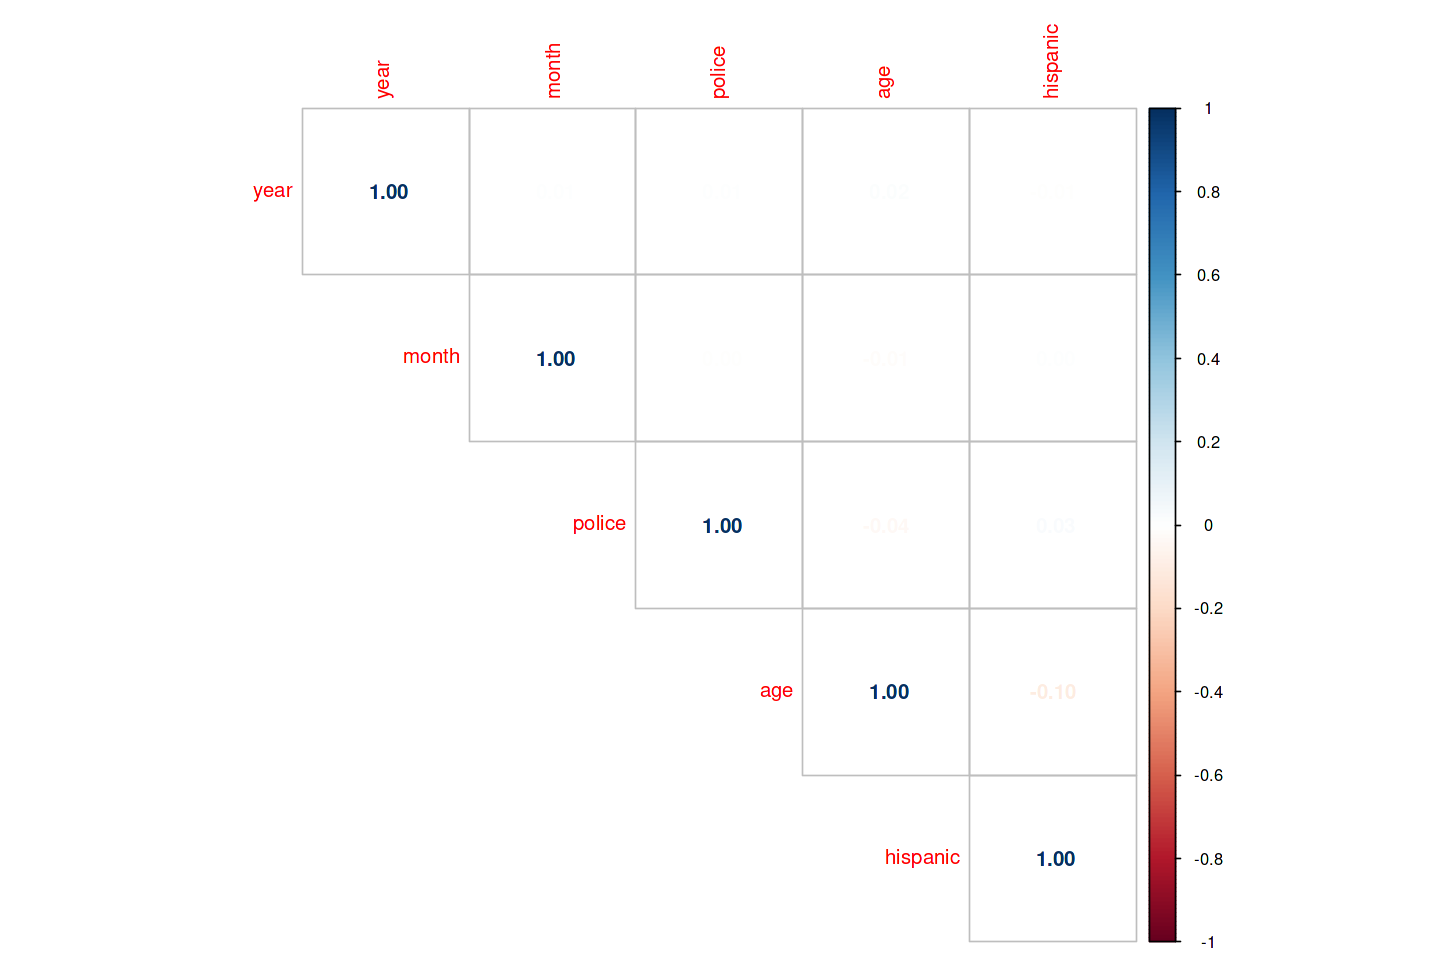

In [48]:
library(corrplot)

cor(corr)

corrplot(cor(corr),
  method = "number",
  type = "upper" # show only upper side
)

Thanks You Time